<a href="https://colab.research.google.com/github/Barragan17/Charaka/blob/master/Colab/BR_goodbooks_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

Data from https://www.kaggle.com/zygmunt/goodbooks-10k

In [3]:
urlRating = '/content/drive/MyDrive/goodreads10k/ratings.csv'
urlBooks = '/content/drive/MyDrive/goodreads10k/books.csv'
urlTags = '/content/drive/MyDrive/goodreads10k/tags.csv'
urlBookTags = '/content/drive/MyDrive/goodreads10k/book_tags.csv'
urlToRead = '/content/drive/MyDrive/goodreads10k/to_read.csv'

In [4]:
rating = pd.read_csv(urlRating)
rating.sample(5)

,book_id,user_id,rating
681474,6851,52969,4
735285,7403,12144,3
40063,401,27834,4
411861,4125,20342,4
935081,9496,45298,4


In [5]:
rating.describe()

,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000


In [6]:
books = pd.read_csv(urlBooks)
books.sample(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
8748,8749,10429025,10429025,7790670,9,61990655,9.780062e+12,Jocelyn Davies,2011.0,A Beautiful Dark,"A Beautiful Dark (A Beautiful Dark, #1)",en-US,3.90,16529,16909,1320,557,1238,3819,5086,6209,https://images.gr-assets.com/books/1327916579m...,https://images.gr-assets.com/books/1327916579s...
4733,4734,22934446,22934446,37100610,20,62225073,9.780062e+12,Alan Cumming,2014.0,Not My Father's Son,Not My Father's Son,eng,4.00,11436,23330,3202,424,935,4437,9923,7611,https://images.gr-assets.com/books/1429218612m...,https://images.gr-assets.com/books/1429218612s...
833,834,4502877,4502877,4551869,1,NaN,NaN,Stephenie Meyer,2008.0,Midnight Sun (Partial Draft),"Midnight Sun (Twilight, #1.5)",eng,4.03,138118,138117,9189,6209,9089,23237,35433,64149,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
2779,2780,1814843,1814843,6627899,44,174166134X,9.781742e+12,John Flanagan,2006.0,The Siege of Macindaw,"The Siege of Macindaw (Ranger's Apprentice, #6)",eng,4.33,37607,41857,1195,223,721,5474,13990,21449,https://images.gr-assets.com/books/1327445821m...,https://images.gr-assets.com/books/1327445821s...
1039,1040,15790837,15790837,21512389,32,316154695,9.780316e+12,David Sedaris,2013.0,Lets Explore Diabetes with Owls,Let's Explore Diabetes with Owls,eng,3.80,81616,90335,7959,1942,5571,23634,36656,22532,https://images.gr-assets.com/books/1359704028m...,https://images.gr-assets.com/books/1359704028s...


In [7]:
books.drop(['isbn13', 'ratings_count', 'best_book_id', 'work_id', 'book_id'], axis=1)

,id,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,272,439023483,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,226,316015849,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,487,61120081,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,1356,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,19,441019455,Ilona Andrews,2010.0,Bayou Moon,"Bayou Moon (The Edge, #2)",eng,4.09,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,19,067973371X,Robert A. Caro,1990.0,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",eng,4.25,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,60,039330762X,Patrick O'Brian,1977.0,The Mauritius Command,The Mauritius Command,eng,4.35,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,7,61711527,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,eng,3.65,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(rating, test_size=0.2, random_state=42)

In [9]:
n_users = len(rating.user_id.unique())
n_books = len(rating.book_id.unique())

In [10]:
from keras.layers import Concatenate

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
24544/24544 [==============================] - 128s 5ms/step - loss: 1.0149
Epoch 2/5
24544/24544 [==============================] - 112s 5ms/step - loss: 0.6812
Epoch 3/5
24544/24544 [==============================] - 112s 5ms/step - loss: 0.6505
Epoch 4/5
24544/24544 [==============================] - 112s 5ms/step - loss: 0.6244
Epoch 5/5
24544/24544 [==============================] - 111s 5ms/step - loss: 0.6037


Text(0, 0.5, 'Training Error')

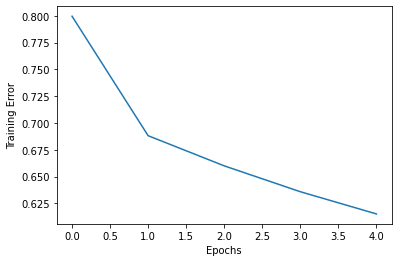

In [11]:
history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [12]:
model2.evaluate([test.user_id, test.book_id], test.rating)

6136/6136 [==============================] - 9s 1ms/step - loss: 0.7153


0.7152819633483887

In [13]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])#input user_id and book_id

In [14]:
[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)] #output prediction_score for a certain book with their actual_score

[5.098597] 5
[3.9357991] 4
[3.5184174] 3
[4.0737677] 5
[3.3394532] 3
[3.8567367] 3
[3.866331] 3
[4.832642] 4
[4.301938] 3
[4.0287013] 5


[None, None, None, None, None, None, None, None, None, None]

In [15]:
book_data = np.array(list(set(rating.book_id)))
book_data #every book_id on rating dataset. 981756 because one book_id can be rated multiple times

array([    1,     2,     3, ...,  9998,  9999, 10000])

In [40]:
user = np.array([100 for i in range(len(book_data))]) #user_id we want to predict
user

array([100, 100, 100, ..., 100, 100, 100])

In [41]:
predictions = model2.predict([user, book_data])

predictions = np.array([a[0] for a in predictions]) #score for every book_id on rating dataset

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([6919, 7946, 8945, 9075, 6360])

In [42]:
len(rating.book_id)

981756

In [43]:
predictions

array([4.355337 , 4.322398 , 2.6456285, ..., 4.3108125, 3.8770962,
       4.22928  ], dtype=float32)

In [44]:
predictions[recommended_book_ids]

array([4.8507266, 4.81052  , 4.790158 , 4.78794  , 4.78262  ],
      dtype=float32)

In [45]:
books[books['id'].isin(recommended_book_ids)]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
6359,6360,675905,675905,661908,10,312997191,9.780313e+12,Elin Hilderbrand,2003.0,Summer People,Summer People,eng,3.93,14369,15792,623,126,649,4124,6239,4654,https://images.gr-assets.com/books/1317063942m...,https://images.gr-assets.com/books/1317063942s...
6918,6919,55354,55354,893440,22,786887583,9.780787e+12,George Carlin,2001.0,Napalm & Silly Putty,Napalm & Silly Putty,eng,4.12,12798,13437,316,141,465,2561,4724,5546,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
7945,7946,39926,39926,836516,43,60512180,9.780061e+12,Naomi Wolf,1990.0,The Beauty Myth: How Images of Beauty Are Used...,The Beauty Myth,eng,3.89,13037,14266,790,234,790,3493,5552,4197,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8944,8945,32529,32529,3214115,40,752848267,9.780753e+12,Lisa Gardner,2001.0,The Next Accident,"The Next Accident (Quincy & Rainie, #3)",en-US,4.16,11261,13328,513,49,231,2323,5612,5113,https://images.gr-assets.com/books/1348816896m...,https://images.gr-assets.com/books/1348816896s...
9074,9075,7199667,7199667,7867989,7,1599904780,9.781600e+12,Jessica Day George,2010.0,Princess of Glass,Princess of Glass (The Princesses of Westfalin...,eng,4.03,17052,17729,1669,145,694,3966,6525,6399,https://images.gr-assets.com/books/1397878579m...,https://images.gr-assets.com/books/1397878579s...
